In [1]:
import numpy as np
import pandas as pd

In [2]:
import pycountry_convert as pc

In [3]:
import matplotlib.pyplot as plt

In [4]:
'''In this document, we will explore the data and make some plots to determine which features are used '''

'In this document, we will explore the data and make some plots to determine which features are used '

In [5]:
dino = pd.read_csv('jurassic_park.csv', sep = '|')
dino
# This dataset was cleaned by a Kaggle user (source: https://www.kaggle.com/code/dsamarina/dinosaur-dataset-cleaning)
# We initially did data cleaning ourselves, but this did a little more, so we will use this.

,name,diet,lived_in,type,taxonomy,species,period_name,period_start,period_end,named,named_year,length_meters
0,aardonyx,herbivorous,South Africa,sauropod,Dinosauria Saurischia Sauropodomorpha Prosauro...,celestae,Early Jurassic,199.0,189.0,Yates Bonnan Neveling Chinsamy and Blackbeard,2010.0,8.0
1,abelisaurus,carnivorous,Argentina,large theropod,Dinosauria Saurischia Theropoda Neotheropoda C...,comahuensis,Late Cretaceous,74.0,70.0,Bonaparte and Novas,1985.0,9.0
2,achelousaurus,herbivorous,USA,ceratopsian,Dinosauria Ornithischia Genasauria Cerapoda Ma...,horneri,Late Cretaceous,83.0,70.0,Sampson,1995.0,6.0
3,achillobator,carnivorous,Mongolia,large theropod,Dinosauria Saurischia Theropoda Neotheropoda T...,giganteus,Late Cretaceous,99.0,84.0,Perle Norell and Clark,1999.0,5.0
4,acrocanthosaurus,carnivorous,USA,large theropod,Dinosauria Saurischia Theropoda Neotheropoda T...,atokensis,Early Cretaceous,115.0,105.0,Stovall and Langston,1950.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
304,yuanmousaurus,herbivorous,China,sauropod,Dinosauria Saurischia Sauropodomorpha Sauropod...,jiangyiensis,Mid Jurassic,180.0,159.0,Lü Li Ji Wang Zhang and Dong,2006.0,17.0
305,yunnanosaurus,omnivorous,China,sauropod,Dinosauria Saurischia Sauropodomorpha Prosauro...,huangi,Early Jurassic,205.0,190.0,Young,1942.0,7.0
306,zalmoxes,herbivorous,Romania,euornithopod,Dinosauria Ornithischia Genasauria Cerapoda Or...,robustus,Late Cretaceous,69.0,69.0,Nopcsa,1902.0,3.0
307,zephyrosaurus,herbivorous,USA,euornithopod,Dinosauria Ornithischia Genasauria Cerapoda Or...,schaffi,Early Cretaceous,120.0,110.0,Sues,1980.0,1.8


In [6]:
# Ensure that the dataset is well cleaned
dino['name'].value_counts()

aardonyx           1
ouranosaurus       1
parasaurolophus    1
paralititan        1
pantydraco         1
                  ..
euhelopus          1
erlikosaurus       1
erketu             1
equijubus          1
zuniceratops       1
Name: name, Length: 309, dtype: int64

In [7]:
# Looks like no duplicate names. Each name is an individual species.
dino['diet'].value_counts()

herbivorous               185
carnivorous                94
omnivorous                 27
unknown                     2
herbivorous/omnivorous      1
Name: diet, dtype: int64

In [8]:
# This looks good, outside of the few missing values. Seems like herbivores are most common
dino['length_meters'].describe()

count    292.000000
mean       7.179349
std        6.310724
min        0.250000
25%        2.400000
50%        6.000000
75%        9.000000
max       35.000000
Name: length_meters, dtype: float64

In [9]:
# This seems quite far skewed right
dino['length_meters'].value_counts().take(np.arange(20))

6.0     21
2.0     19
5.0     19
9.0     19
3.0     16
7.0     15
4.0     14
10.0    13
1.0     12
15.0    11
12.0     9
1.5      7
1.8      7
18.0     5
8.0      5
1.2      4
20.0     4
23.0     4
13.0     4
3.5      4
Name: length_meters, dtype: int64

In [10]:
# A lot of these values end in a 0.
# Perhaps, archaelogists had better estimates for some dinosaurs' lengths than others.
# So when they had a poorer estimate, they simply rounded to the nearest meter

dino['period_name'].value_counts()

Late Cretaceous     139
Early Cretaceous     64
Late Jurassic        43
Mid Jurassic         26
Early Jurassic       20
Late Triassic        16
USA                   1
Name: period_name, dtype: int64

In [11]:
dino[dino['period_name'] == 'USA']

,name,diet,lived_in,type,taxonomy,species,period_name,period_start,period_end,named,named_year,length_meters
125,hagryphus,omnivorous,NaN,small theropod,Dinosauria Saurischia Theropoda Neotheropoda T...,giganteus,USA,NaN,NaN,Zanno and Sampson,2005.0,3.0


In [12]:
# This seems to have been mistakenly had a period name of USA. Really, without the start and end, there is no period
# estimator. Therefore, I will manually fix this value
dino.loc[125, 'lived_in'] = 'USA'
dino.loc[125, 'period_name'] = None
dino.loc[125]

name                                                     hagryphus
diet                                                    omnivorous
lived_in                                                       USA
type                                                small theropod
taxonomy         Dinosauria Saurischia Theropoda Neotheropoda T...
species                                                  giganteus
period_name                                                   None
period_start                                                   NaN
period_end                                                     NaN
named                                            Zanno and Sampson
named_year                                                  2005.0
length_meters                                                  3.0
Name: 125, dtype: object

In [13]:
# Remove columns we wouldn't use for our prediction column
predict = dino.drop(columns = ['named_year', 'named', 'taxonomy', 'type'])

In [14]:
predict

,name,diet,lived_in,species,period_name,period_start,period_end,length_meters
0,aardonyx,herbivorous,South Africa,celestae,Early Jurassic,199.0,189.0,8.0
1,abelisaurus,carnivorous,Argentina,comahuensis,Late Cretaceous,74.0,70.0,9.0
2,achelousaurus,herbivorous,USA,horneri,Late Cretaceous,83.0,70.0,6.0
3,achillobator,carnivorous,Mongolia,giganteus,Late Cretaceous,99.0,84.0,5.0
4,acrocanthosaurus,carnivorous,USA,atokensis,Early Cretaceous,115.0,105.0,12.0
...,...,...,...,...,...,...,...,...
304,yuanmousaurus,herbivorous,China,jiangyiensis,Mid Jurassic,180.0,159.0,17.0
305,yunnanosaurus,omnivorous,China,huangi,Early Jurassic,205.0,190.0,7.0
306,zalmoxes,herbivorous,Romania,robustus,Late Cretaceous,69.0,69.0,3.0
307,zephyrosaurus,herbivorous,USA,schaffi,Early Cretaceous,120.0,110.0,1.8


In [15]:
predict['diet'].value_counts()

herbivorous               185
carnivorous                94
omnivorous                 27
unknown                     2
herbivorous/omnivorous      1
Name: diet, dtype: int64

In [16]:
known_diet = predict[(predict['diet'] == 'herbivorous') | (predict['diet'] == 'carnivorous') | (predict['diet'] == 'omnivorous')].copy()
known_diet

,name,diet,lived_in,species,period_name,period_start,period_end,length_meters
0,aardonyx,herbivorous,South Africa,celestae,Early Jurassic,199.0,189.0,8.0
1,abelisaurus,carnivorous,Argentina,comahuensis,Late Cretaceous,74.0,70.0,9.0
2,achelousaurus,herbivorous,USA,horneri,Late Cretaceous,83.0,70.0,6.0
3,achillobator,carnivorous,Mongolia,giganteus,Late Cretaceous,99.0,84.0,5.0
4,acrocanthosaurus,carnivorous,USA,atokensis,Early Cretaceous,115.0,105.0,12.0
...,...,...,...,...,...,...,...,...
304,yuanmousaurus,herbivorous,China,jiangyiensis,Mid Jurassic,180.0,159.0,17.0
305,yunnanosaurus,omnivorous,China,huangi,Early Jurassic,205.0,190.0,7.0
306,zalmoxes,herbivorous,Romania,robustus,Late Cretaceous,69.0,69.0,3.0
307,zephyrosaurus,herbivorous,USA,schaffi,Early Cretaceous,120.0,110.0,1.8


In [17]:
known_diet[['diet', 'period_start']].groupby('diet').mean()

,period_start
diet,
carnivorous,131.180851
herbivorous,119.781421
omnivorous,111.615385


In [18]:
print(f'''Range of years dinosaurs existed according this dataset: \
{known_diet["period_start"].max():.0f} million years ago to {known_diet["period_end"].min():.0f} million years ago''')

Range of years dinosaurs existed according this dataset: 228 million years ago to 65 million years ago


In [56]:
# Next, we want to make a graph of the number of herbivores, carnivores, and omnivores when the species was
# not extinct. This is a multi-step process, but we'll start by defining when the species wasn't extinct and get
# array
num_herbivores = np.array([], dtype = int)
num_carnivores = np.array([], dtype = int)
num_omnivores = np.array([], dtype = int)
for year in np.arange(228, 62, -1): # Years when dinosaurs still existed
    in_scope = known_diet[(known_diet['period_start'] >= year) & (known_diet['period_end'] <= year)]
    num_herbivores = np.append(num_herbivores, in_scope[in_scope['diet'] == 'herbivorous'].shape[0])
    num_carnivores = np.append(num_carnivores, in_scope[in_scope['diet'] == 'carnivorous'].shape[0])
    num_omnivores = np.append(num_omnivores, in_scope[in_scope['diet'] == 'omnivorous'].shape[0])
num_herbivores

array([ 0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  4,  1,  2,  2,  2,  8,  7,  7,  7,  5,  6,  6,  6,  6,  6,  8,
        6,  5,  5,  5,  7,  4,  3,  3,  3,  4,  4,  4,  4,  4,  6,  3,  3,
        5,  5,  6,  6,  6,  6,  6, 10, 12, 10, 10, 10, 10, 11, 10, 10, 10,
       10, 10,  4,  5,  5, 13, 24, 22, 23, 23, 25, 22, 22, 22, 22, 22, 15,
       15, 18,  8,  9,  6,  6,  6,  6,  6,  4,  4,  7,  7,  7,  7,  7, 11,
        8, 11,  8,  8,  8, 21, 19, 19, 19, 19, 19, 21, 21, 21, 24, 20, 22,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 21, 11, 11, 10, 10, 13,  7,
        6,  6,  7, 10,  8,  7, 11, 12, 18, 14, 14, 17, 23, 21, 24, 25, 42,
       44, 41, 26, 30, 34, 32, 24, 24, 22, 19, 17,  0,  0])

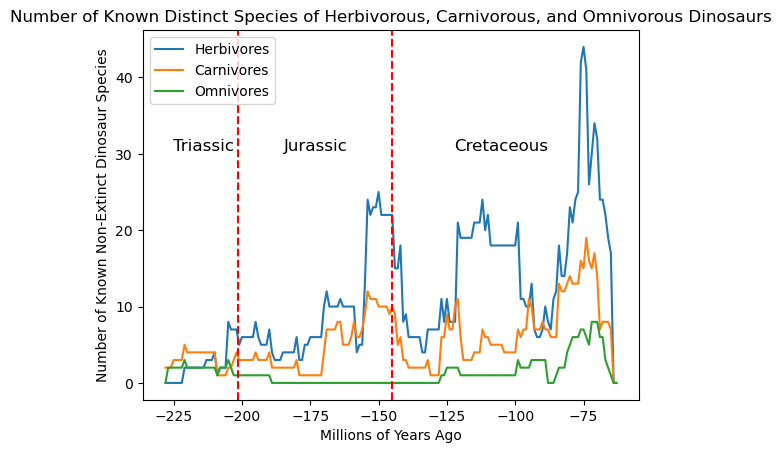

In [69]:
years = (range(-228, -62))
fig, ax = plt.subplots()
ax.plot(years, num_herbivores, label='Herbivores')
ax.plot(years, num_carnivores, label='Carnivores')
ax.plot(years, num_omnivores, label='Omnivores')
ax.legend()
ax.set_ylabel('Number of Known Non-Extinct Dinosaur Species')
ax.set_xlabel('Millions of Years Ago')
ax.set_title('Number of Known Distinct Species of Herbivorous, Carnivorous, and Omnivorous Dinosaurs')
ax.axvline(-201.5, color = 'r', linestyle = 'dashed') # Start of Jurassic Era
ax.axvline(-145, color = 'r', linestyle = 'dashed') # End of Jurassic Era
ax.text(-173, 30, 'Jurassic', ha='center', va='bottom', fontsize=12, color='black')
ax.text(-105, 30, 'Cretaceous', ha='center', va='bottom', fontsize=12, color='black')
ax.text(-214, 30, 'Triassic', ha='center', va='bottom', fontsize=12, color='black')
plt.show()


In [46]:
predict

,name,diet,lived_in,species,period_name,period_start,period_end,length_meters,continent
0,aardonyx,herbivorous,South Africa,celestae,Early Jurassic,199.0,189.0,8.0,AF
1,abelisaurus,carnivorous,Argentina,comahuensis,Late Cretaceous,74.0,70.0,9.0,SA
2,achelousaurus,herbivorous,USA,horneri,Late Cretaceous,83.0,70.0,6.0,NA
3,achillobator,carnivorous,Mongolia,giganteus,Late Cretaceous,99.0,84.0,5.0,AS
4,acrocanthosaurus,carnivorous,USA,atokensis,Early Cretaceous,115.0,105.0,12.0,NA
...,...,...,...,...,...,...,...,...,...
304,yuanmousaurus,herbivorous,China,jiangyiensis,Mid Jurassic,180.0,159.0,17.0,AS
305,yunnanosaurus,omnivorous,China,huangi,Early Jurassic,205.0,190.0,7.0,AS
306,zalmoxes,herbivorous,Romania,robustus,Late Cretaceous,69.0,69.0,3.0,EU
307,zephyrosaurus,herbivorous,USA,schaffi,Early Cretaceous,120.0,110.0,1.8,NA


In [47]:
predict['lived_in'].value_counts()

USA               78
China             48
Mongolia          46
Argentina         26
United Kingdom    21
Canada            14
Germany            8
Niger              6
Australia          6
Tanzania           5
South Africa       5
Spain              5
India              4
France             4
Brazil             4
Madagascar         3
Zimbabwe           3
Morocco            3
Kazakhstan         2
Japan              2
Russia             2
Romania            2
Egypt              2
Uzbekistan         2
Antarctica         1
North Africa       1
Lesotho            1
Uruguay            1
Malawi             1
Tunisia            1
Wales              1
Switzerland        1
Name: lived_in, dtype: int64

In [48]:
# There are a lot of dinosaurs found in modern-day US, likely partly because archaelogists have looked most in the
# US. However, these countries are not very helpful for predicting the time a new dinosaur lives. Instead, we would
# rather use the continent name

In [49]:
# Using this library to do so

def change(country):
    if country == 'North Africa':
        return 'SA'
    if country == 'Antarctica':
        return 'AQ'
    if country == 'Wales':
        return 'EU'

    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        return continent_code
    except:
        return 'Not found'

country_to_continent = predict['lived_in'].apply(change)
predict = predict.assign(continent=country_to_continent)

In [50]:
known_continent = predict[predict['continent'] != 'Not found']

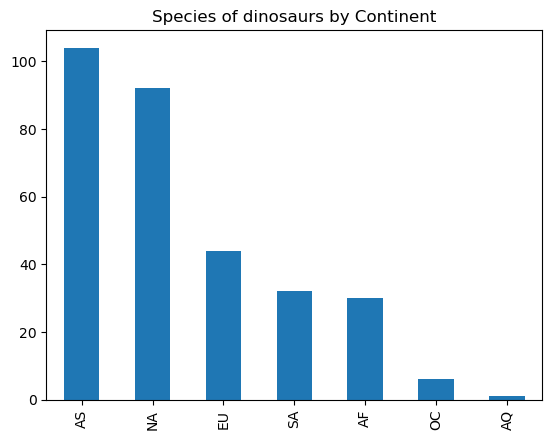

In [51]:
known_continent['continent'].value_counts().plot(kind = 'bar', title = 'Species of dinosaurs by Continent');

In [60]:
# Doing the same, except plotting the continent
num_asia, num_africa, num_europe, num_oceania, num_antarctica, num_NA, num_SA = [np.array([], dtype = int)] * 7
for year in np.arange(228, 62, -1):
    still_exists = predict[(predict['period_start'] >= year) & (predict['period_end'] <= year)]
    num_asia = np.append(num_asia, still_exists[still_exists['continent'] == 'AS'].shape[0])
    num_africa = np.append(num_africa, still_exists[still_exists['continent'] == 'AF'].shape[0])
    num_oceania = np.append(num_oceania, still_exists[still_exists['continent'] == 'OC'].shape[0])
    num_SA = np.append(num_SA, still_exists[still_exists['continent'] == 'SA'].shape[0])
    num_NA = np.append(num_NA, still_exists[still_exists['continent'] == 'NA'].shape[0])
    num_europe = np.append(num_europe, still_exists[still_exists['continent'] == 'EU'].shape[0])
    num_antarctica = np.append(num_antarctica, still_exists[still_exists['continent'] == 'AQ'].shape[0])
        
num_asia

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,
        4,  4,  4,  4,  4,  1,  1,  1,  1,  2,  2,  2,  2,  2,  5,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  8, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       11, 13,  7,  8,  8,  9, 10,  7,  8,  8,  8,  8,  8,  8,  8,  8,  6,
        5,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,
        6,  9,  8,  8, 11, 16, 11,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 14,  6,  7,  7,  9, 10, 10,
       10, 10, 11, 13, 10,  9, 11, 15, 21, 15, 15, 22, 25, 22, 23, 23, 24,
       25, 23, 22, 28, 30, 27, 18, 18, 10, 10,  8,  0,  0])

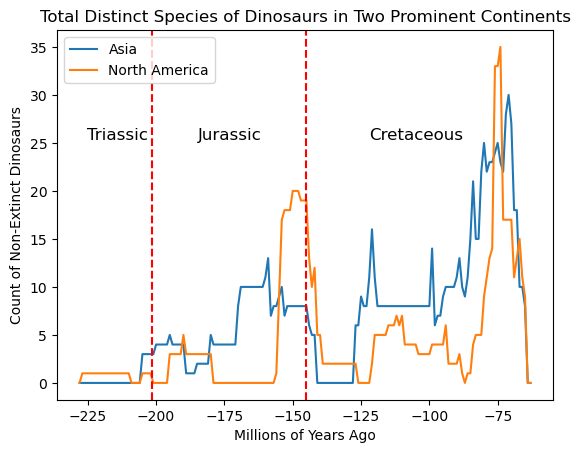

In [66]:
# We plot only Asia and North America to reduce plot clutter
fig, ax = plt.subplots()
ax.plot(years, num_asia, label='Asia')
ax.plot(years, num_NA, label='North America')
ax.legend()
ax.set_ylabel('Count of Non-Extinct Dinosaurs')
ax.set_xlabel('Millions of Years Ago')
ax.set_title('Total Distinct Species of Dinosaurs in Two Prominent Continents')
ax.axvline(-201.5, color = 'r', linestyle = 'dashed')
ax.axvline(-145, color = 'r', linestyle = 'dashed')
ax.text(-173, 25, 'Jurassic', ha='center', va='bottom', fontsize=12, color='black')
ax.text(-105, 25, 'Cretaceous', ha='center', va='bottom', fontsize=12, color='black')
ax.text(-214, 25, 'Triassic', ha='center', va='bottom', fontsize=12, color='black')
plt.show()

In [36]:
dino_length = dino.copy()
dino_length['period_mean'] = (dino_length['period_end'] + dino_length['period_start'])/-2 # Change sign to represent years ago
dino_length

,name,diet,lived_in,type,taxonomy,species,period_name,period_start,period_end,named,named_year,length_meters,period_mean
0,aardonyx,herbivorous,South Africa,sauropod,Dinosauria Saurischia Sauropodomorpha Prosauro...,celestae,Early Jurassic,199.0,189.0,Yates Bonnan Neveling Chinsamy and Blackbeard,2010.0,8.0,-194.0
1,abelisaurus,carnivorous,Argentina,large theropod,Dinosauria Saurischia Theropoda Neotheropoda C...,comahuensis,Late Cretaceous,74.0,70.0,Bonaparte and Novas,1985.0,9.0,-72.0
2,achelousaurus,herbivorous,USA,ceratopsian,Dinosauria Ornithischia Genasauria Cerapoda Ma...,horneri,Late Cretaceous,83.0,70.0,Sampson,1995.0,6.0,-76.5
3,achillobator,carnivorous,Mongolia,large theropod,Dinosauria Saurischia Theropoda Neotheropoda T...,giganteus,Late Cretaceous,99.0,84.0,Perle Norell and Clark,1999.0,5.0,-91.5
4,acrocanthosaurus,carnivorous,USA,large theropod,Dinosauria Saurischia Theropoda Neotheropoda T...,atokensis,Early Cretaceous,115.0,105.0,Stovall and Langston,1950.0,12.0,-110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,yuanmousaurus,herbivorous,China,sauropod,Dinosauria Saurischia Sauropodomorpha Sauropod...,jiangyiensis,Mid Jurassic,180.0,159.0,Lü Li Ji Wang Zhang and Dong,2006.0,17.0,-169.5
305,yunnanosaurus,omnivorous,China,sauropod,Dinosauria Saurischia Sauropodomorpha Prosauro...,huangi,Early Jurassic,205.0,190.0,Young,1942.0,7.0,-197.5
306,zalmoxes,herbivorous,Romania,euornithopod,Dinosauria Ornithischia Genasauria Cerapoda Or...,robustus,Late Cretaceous,69.0,69.0,Nopcsa,1902.0,3.0,-69.0
307,zephyrosaurus,herbivorous,USA,euornithopod,Dinosauria Ornithischia Genasauria Cerapoda Or...,schaffi,Early Cretaceous,120.0,110.0,Sues,1980.0,1.8,-115.0


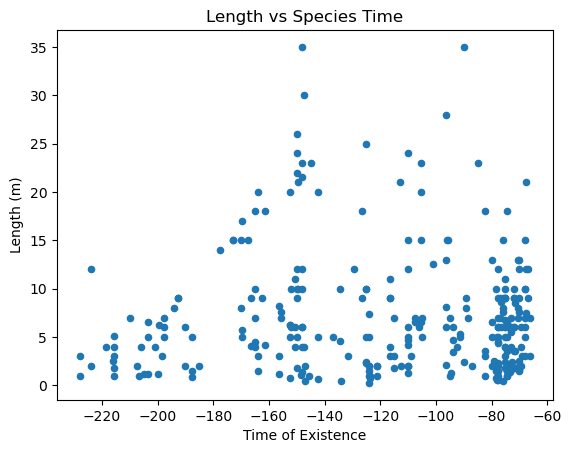

In [41]:
dino_length.plot(kind = 'scatter', x = 'period_mean', y = 'length_meters'
          , title = 'Length vs Species Time', ylabel = 'Length (m)', xlabel = 'Time of Existence');

In [65]:
print(f'Correlation between length and period mean: {np.round(dino_length.corr()["length_meters"]["period_mean"], 3)}')

Correlation between length and period mean: -0.012


In [31]:
# The length seems like it barely affects the period from both the graph and correlations. Based on how our models run
# with and without lenghth, we will consider removing it.